# SYD DAT 4 Project : Hospital Readmissions prediction

### Overview 

I had an opportunity to work as a software engineer at Vanderbilt University Medical Center,US where I was involved in biomedical research projects. It is very gratifying as a computer science person to help solve interesting and challenging health care problems, which is why I choose this project.

Hospital readmission means when a patient is re-admitted to a hospital within short period(usually 28/30 days)after first time or initial discharge. Such readmissions are major health care concern for most countries like US, UK, Australia and many others. This leads to increased wait times, increased medical errors resulting in risking patient safety and unncessary deaths. High readmission rate is infact an indicator of poor quality care of the hospital. It also puts huge monetary burden on the hospitals as well as the government. In this project, I want to identify patients who are likely to be readmitted to the hospital. By doing this, proper care and management of such patients can be planned by their care providers.

### Goal(s) : 
Predict if a patient will be readmitted to the hospital or not?

### Data set used : 

In order to achieve the above goal(s), I need a hospital data set that has records of all hospitalizations entries for its patients for certain number of years. It should contain information like why the patients were admitted, which department they were admitted for, how many times they were admitted, what medications they were on, what lab tests were conducted, how many days they stayed in hospital, vitals signs like heights/weights, age, race, blood pressure, smoking status, their electronic medical records, billing records, genetics data, etc.

Of course, it's hard to obtain such a heterogeneous dataset which is publicly available as patient data are very confidential. Though there are quite a few data sets that contain substantial information and after going through some of them, I decided to use "Diabetes 130-US hospitals for years 1999-2008 Data Set".

This is a public available database by Center for Clinical and Translational Research, Virginia Commonwealth University. This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO). It contains 10 years of diabetes patients data across 130 US hospitals.

http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

### Summary of data : 

From the below python code, following observations are made :-
 * There are 50 features and 101766 observations(hospitalizations). 
 
 
 * Each row in dataframe represents one hospital admission. On an average, there are 5 hospitalizations for each patient (patient_nbr is the de-identifed patient ID).
 
 
 * In the dataset, "readmitted" is the target varible with three classes :
 
 NO means never readmitted (~54% of total dataset)
 
 &lt;30 means readmitted within 30 days (~11% of total dataset)
 
 &gt;30 means readmitted after 30 days (~35% of total dataset)


 * To start with a simple binary classification model, I am grouping &lt;30 and &gt;30 classes of readmitted target varible into one class "1", which means the patient is readmitted anytime. And class NO is "0" means patient is never readmitted. Also this gives even distribution between binary classes. 
 
 
 * Several patients have multiple hospitalizations, so I have used only the first admission and predict whether they will be re-admitted or not. This gives 71518 unique patient hospitalizations.
 
 
 * Numeric features are : time_in_hospital, num_medications,num_lab_procedures, num_procedures, number_outpatient, number_inpatient, number_diagnoses. 


 * The average amount of time spent(time_in_hospital) in a hospital is 4 days and there is a good variation in this feature ranging from 1 day to 14 days.
 
 
 * Number of lab procedures conducted during the stay is on an average 43, and it ranges from 1 to 132.
 
 
 * The average number of medications administered is 16 with minimum 1 and maximum of 81 medications.
 
 
 * Many features have non-numeric values, e.g.: race, gender, age is in range, medications like citoglipton, insulin, diag_1, diag_2, diag_3, etc,. So need to transform them.
 
 
 * Weight feature has 97% data missing, so I will not include it. I am not sure if it makes sense to impute such large missing data. May be better off by excluding that feature for the time being.
 

### Modelling techniques : 

* As of now I have used only numeric features for classification and used logistic regression, regularized logistic regression and decision trees methods. 


* My next step is to transform non-numeric features into categorical(nominal) values and add them into the models. Some them I think are crucial.


* Try out other models like KNN classfication, random forests, SVM, etc.


* Question : Several non-numeric features have more than 3 categories. Does it make sense to binarize them all to be used in classic logistic regression? Or better off using models that would accept categorical features without binarizing them?

### Visualizations : 

Although the main goal of the project is to use a modelling technique to predict patient readmission, but if time permits I would to like make some dashboard so that hospitals or clinicians can use to visualize data for their patients.








In [232]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [233]:
# read diabetic_data.csv into a DataFrame called 'hospital_set'
hospital_set = pd.read_table('dataset_diabetes/diabetic_data.csv', sep=',')

In [234]:
hospital_set.head()
#hospital_set['diag_1'].head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [235]:
# examine the default index, data types, and shape
#hospital_set.index
hospital_set.dtypes
#hospital_set.shape
 

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [236]:
hospital_set.describe() 

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [237]:
# Here "readmitted" is the target variable
hospital_set.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [238]:
# Transforming the "readmitted" variable into binary outcome. 
# NO = 0 (patients are not readmitted, it could be their first/initial admission)
# >30 = 0 (patients admitted after 30 days are not called readmitted)
# < 30 = 1 (patients admitted within 30 days are called readmitted)
hospital_set['readmitted'] = hospital_set['readmitted'].map({ "<30" : 1, ">30" : 1,"NO" : 0})
hospital_set.readmitted.value_counts()



0    54864
1    46902
Name: readmitted, dtype: int64

In [239]:
# Here many patients have multiple encounter ids (hospitalizations). 
# For predictions, I will just take the first encounter id as first admission and 
# predict whether the patient will be readmitted next time or not withing 30 days window.

# Here I use group by function to group by the hospital_set for each patient 
# and then take minimum value for encounter id to get first admission for each patient.
hospital_subset = hospital_set.loc[hospital_set.groupby("patient_nbr")["encounter_id"].idxmin()]


In [240]:
# TRANSFORMATIONS FOR CATEGORICAL VALUES

# create dummy variables for admission_source and admission_type features.

admission_source_dumies = pd.get_dummies(hospital_subset.admission_source_id, prefix='admission_source')
admission_type_dumies = pd.get_dummies(hospital_subset.admission_type_id, prefix='admission_type')

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
hospital_subset = pd.concat([hospital_subset, admission_source_dumies], axis=1)
hospital_subset = pd.concat([hospital_subset, admission_type_dumies], axis=1)

# encode diabetesMed feature
hospital_subset['diabetesMed_Yes'] = hospital_subset.diabetesMed.map({'Yes':1, 'No':0})


In [241]:
# Mapping ICD9(disease codes) to numeric values. Here I group codes by disease type.

from collections import Counter

Circulatory_map =  Counter({})
for i in range(390,460):
    Circulatory_map.update({str(i): 1})
Circulatory_map.update({'785': 1})

Respiratory_map =  Counter({})
for i in range(460,520):
    Respiratory_map.update({str(i): 2})
Respiratory_map.update({'786': 2})

Digestive_map =  Counter({})
for i in range(520,580):
    Digestive_map.update({str(i): 3})
Digestive_map.update({'787': 3})  

diabetes_map = Counter({'250': 4, '250.01':4,'250.02':4,'250.03':4,'250.1':4,'250.11':4,'250.12':4,'250.13':4,
            '250.2':4,'250.21':4,'250.22':4,'250.23':4,'250.3':4,'250.31':4,'250.32':4,'250.33':4,
            '250.4':4,'250.41':4,'250.42':4,'250.43':4,'250.5':4,'250.51':4,'250.52':4,'250.53':4,
            '250.6':4,'250.7':4,'250.8':4,'250.81':4,'250.82':4,'250.83':4,
            '250.9':4,'250.91':4,'250.92':4,'250.93':4})

Injury_map =  Counter({})
for i in range(800,1000):
    Injury_map.update({str(i): 5})


Musculoskeletal_map =  Counter({})
for i in range(710,740):
    Musculoskeletal_map.update({str(i): 6})
                           
Genitourinary_map =  Counter({})
for i in range(580,630):
    Genitourinary_map.update({str(i): 7})
Genitourinary_map.update({'788': 7})

Neoplasms_map =  Counter({})
for i in range(140,240):
    Neoplasms_map.update({str(i): 8})
                     
Others_map =  Counter({})
for i in range(240,250):
    Others_map.update({str(i): 9})
for i in range(251,280):
    Others_map.update({str(i): 9})
for i in range(680,710):
    Others_map.update({str(i): 9})
for i in range(001,140):
    Others_map.update({str(i): 9})
for i in range(291,320):
    Others_map.update({str(i): 9}) 
for i in range(281,290):
    Others_map.update({str(i): 9})
for i in range(320,360):
    Others_map.update({str(i): 9})
for i in range(630,680):
    Others_map.update({str(i): 9})
for i in range(360,390):
    Others_map.update({str(i): 9})
for i in range(740,760):
    Others_map.update({str(i): 9})
Others_map.update({'782': 9})    

other_disease1_map =  Counter({'E909': 9,'V07': 9,'V25': 9,'V26': 9,'V43': 9,
            'V45': 9,'V51': 9,'V53': 9,'V54': 9,'V55': 9,
            'V56': 9,'V57': 9,'V57': 9,'V58': 9,'V60': 9,
            'V63': 9,'V66': 9,'V67': 9,'V63': 9,'V70': 9,'V71': 9}) 

All_disease_map = diabetes_map + other_disease1_map + Circulatory_map + Respiratory_map + Digestive_map + Injury_map + Musculoskeletal_map + Genitourinary_map + Neoplasms_map + Others_map

#All_disease_map

In [242]:
hospital_subset['diag_1_map'] = hospital_subset['diag_1'].map(All_disease_map)
hospital_subset['diag_1_map'].head()
hospital_subset['diag_1_map'].value_counts()

1.0    21894
9.0     9919
2.0     9776
3.0     6570
4.0     5805
5.0     4779
6.0     4080
7.0     3514
8.0     2742
Name: diag_1_map, dtype: int64

In [243]:
# create dummy variables for new feature diag_1_map.

diag_1_map_dumies = pd.get_dummies(hospital_subset.diag_1_map, prefix='diag_1_map')
diag_1_map_dumies.head()

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
hospital_subset = pd.concat([hospital_subset, diag_1_map_dumies], axis=1)

In [244]:
# Look for any linear correlations in the data
hospital_subset.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,diag_1_map,diag_1_map_1.0,diag_1_map_2.0,diag_1_map_3.0,diag_1_map_4.0,diag_1_map_5.0,diag_1_map_6.0,diag_1_map_7.0,diag_1_map_8.0,diag_1_map_9.0
encounter_id,1.000000,0.502034,-0.150258,-0.136536,-0.113674,-0.069457,-0.051946,-0.005310,0.056166,0.070958,...,0.032761,-0.042735,0.017081,0.011501,-0.030675,0.017936,0.007258,0.033001,-0.000187,0.011169
patient_nbr,0.502034,1.000000,-0.010712,-0.136942,-0.019440,-0.017976,0.008597,-0.022938,0.015527,0.087480,...,0.027140,-0.035963,0.016207,0.010866,-0.031068,0.018169,-0.001508,0.021511,0.002131,0.012627
admission_type_id,-0.150258,-0.010712,1.000000,0.088565,0.121644,-0.017477,-0.117187,0.132050,0.095376,0.038149,...,0.074435,-0.005571,-0.060911,-0.030802,-0.038324,-0.013221,0.137095,-0.011035,0.065713,0.027186
discharge_disposition_id,-0.136536,-0.136942,0.088565,1.000000,0.005202,0.163874,0.028224,0.021512,0.114623,-0.016582,...,0.012444,0.016435,-0.031633,-0.057631,-0.012443,0.071084,0.071176,-0.019489,0.008545,-0.014819
admission_source_id,-0.113674,-0.019440,0.121644,0.005202,1.000000,0.007097,0.089209,-0.127122,-0.058141,0.018547,...,-0.089223,-0.004244,0.096804,0.044769,0.018653,0.011797,-0.131468,-0.008739,-0.095478,-0.023397
time_in_hospital,-0.069457,-0.017976,-0.017477,0.163874,0.007097,1.000000,0.330146,0.188911,0.469426,-0.014984,...,0.075987,-0.024166,-0.027693,-0.000880,-0.007437,0.018991,-0.038137,-0.017986,0.063363,0.079124
num_lab_procedures,-0.051946,0.008597,-0.117187,0.028224,0.089209,0.330146,1.000000,0.050072,0.261911,-0.006933,...,-0.065090,0.029753,0.026633,0.030373,0.047112,-0.028956,-0.134295,0.032094,-0.037803,-0.021433
num_procedures,-0.005310,-0.022938,0.132050,0.021512,-0.127122,0.188911,0.050072,1.000000,0.403738,-0.018347,...,-0.145415,0.264275,-0.168639,0.002011,-0.098700,0.021995,0.036080,-0.047016,0.081406,-0.125880
num_medications,0.056166,0.015527,0.095376,0.114623,-0.058141,0.469426,0.261911,0.403738,1.000000,0.026183,...,-0.066707,0.104999,-0.010918,-0.046487,-0.087230,0.038178,0.121329,-0.037185,0.039382,-0.080020
number_outpatient,0.070958,0.087480,0.038149,-0.016582,0.018547,-0.014984,-0.006933,-0.018347,0.026183,1.000000,...,0.027169,-0.017564,-0.005101,-0.001452,-0.003343,-0.006048,0.005432,0.012033,0.007497,0.019415


In [248]:
feature_cols = ['time_in_hospital', 'num_medications','num_lab_procedures','num_procedures','number_outpatient','number_inpatient','number_diagnoses','diabetesMed_Yes']

for t in admission_source_dumies:
    feature_cols.append(t)
    
for t in admission_type_dumies:
    feature_cols.append(t)

for t in diag_1_map_dumies:
    feature_cols.append(t)
    
feature_cols

['time_in_hospital',
 'num_medications',
 'num_lab_procedures',
 'num_procedures',
 'number_outpatient',
 'number_inpatient',
 'number_diagnoses',
 'diabetesMed_Yes',
 'admission_source_1',
 'admission_source_2',
 'admission_source_3',
 'admission_source_4',
 'admission_source_5',
 'admission_source_6',
 'admission_source_7',
 'admission_source_8',
 'admission_source_9',
 'admission_source_10',
 'admission_source_11',
 'admission_source_13',
 'admission_source_14',
 'admission_source_17',
 'admission_source_20',
 'admission_source_22',
 'admission_source_25',
 'admission_type_1',
 'admission_type_2',
 'admission_type_3',
 'admission_type_4',
 'admission_type_5',
 'admission_type_6',
 'admission_type_7',
 'admission_type_8',
 'diag_1_map_1.0',
 'diag_1_map_2.0',
 'diag_1_map_3.0',
 'diag_1_map_4.0',
 'diag_1_map_5.0',
 'diag_1_map_6.0',
 'diag_1_map_7.0',
 'diag_1_map_8.0',
 'diag_1_map_9.0']

In [249]:
# use numeric features to apply logistic regression

X = hospital_subset[feature_cols]
#X = hospital_subset[feature_cols].join(admission_type_dumies.ix[:, 'admission_type_1':])
#data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
y = hospital_subset.readmitted



In [250]:
# Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [251]:
# Fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('time_in_hospital', 0.037585468465342692),
 ('num_medications', -0.0027726532912235738),
 ('num_lab_procedures', -0.00011908032850801252),
 ('num_procedures', -0.040216990826917404),
 ('number_outpatient', 0.094260200486596835),
 ('number_inpatient', 0.46474309589396862),
 ('number_diagnoses', 0.086391507808109225),
 ('diabetesMed_Yes', 0.27869805905837702),
 ('admission_source_1', 0.2045772791863803),
 ('admission_source_2', 0.0013032156237285583),
 ('admission_source_3', 0.43759258182671301),
 ('admission_source_4', -0.43215000522651553),
 ('admission_source_5', -0.0024586896075395603),
 ('admission_source_6', -0.22241590911197831),
 ('admission_source_7', 0.36225651195033926),
 ('admission_source_8', -0.76064402402622877),
 ('admission_source_9', -0.89294147449320871),
 ('admission_source_10', -0.12113527682540032),
 ('admission_source_11', -0.1594248715333057),
 ('admission_source_13', 0.0),
 ('admission_source_14', -0.32132627771900124),
 ('admission_source_17', 0.00636812164954

In [252]:
# Make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
#print metrics.accuracy_score(y_test, y_pred_class)
print 'Accuracy (Simple logistic regression) =', metrics.accuracy_score(y_test, y_pred_class)

# Calculate the AUC metric
#metrics.roc_auc_score(y_test, y_pred_class)
print "ROC(Simple logistic regression) = ",metrics.roc_auc_score(y_test, y_pred_class)

Accuracy (Simple logistic regression) = 0.624832214765
ROC(Simple logistic regression) =  0.552588592158


In [253]:
from sklearn.metrics import classification_report
target_names = ['Readmission_NO', 'Readmission_YES']
print(classification_report(y_test, y_pred_class, target_names=target_names))

                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.91      0.74     10756
Readmission_YES       0.59      0.20      0.29      7124

    avg / total       0.61      0.62      0.57     17880



In [254]:
# LOGISTIC REGRESSION CROSS VALIDAION 
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=100)
print scores
print scores.mean()

[ 0.61871508  0.62011173  0.61452514  0.62430168  0.61871508  0.68435754
  0.6075419   0.61452514  0.62569832  0.63407821  0.61173184  0.61173184
  0.63547486  0.61173184  0.62150838  0.59916201  0.60055866  0.63128492
  0.66899441  0.61731844  0.6103352   0.6103352   0.6075419   0.61312849
  0.60614525  0.59217877  0.57402235  0.63268156  0.61871508  0.58100559
  0.61871508  0.63826816  0.62290503  0.64615385  0.64615385  0.62937063
  0.62377622  0.58181818  0.5972028   0.6         0.6013986   0.5986014
  0.62377622  0.63076923  0.62377622  0.61678322  0.64895105  0.66573427
  0.67132867  0.63076923  0.63636364  0.60559441  0.63636364  0.65174825
  0.61118881  0.64055944  0.61818182  0.60979021  0.65454545  0.64755245
  0.7006993   0.69090909  0.63496503  0.66153846  0.66013986  0.66293706
  0.67272727  0.6027972   0.56923077  0.55104895  0.54545455  0.57482517
  0.6013986   0.61258741  0.61118881  0.5986014   0.5958042   0.59440559
  0.59300699  0.6         0.62237762  0.6027972   0.

In [305]:
########## Logistic Regression With L1 Penalty ##########
# logistic regression with L1 penalty (C must be positive, smaller means more regularization)
logreg_l1 = LogisticRegression(C=0.1, penalty='l1')
logreg_l1.fit(X_train, y_train)
logreg_l1.coef_
y_pred_l1 = logreg_l1.predict(X_test)

# Access accuracy
print 'Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1)
print "ROC(L1 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l1)

print(classification_report(y_test, y_pred_l1, target_names=target_names))

Accuracy (L1 penalty) = 0.624217002237
ROC(L1 penalty) =  0.551058166561
                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.91      0.74     10756
Readmission_YES       0.59      0.19      0.29      7124

    avg / total       0.61      0.62      0.56     17880



In [306]:
########## Logistic Regression With L2 Penalty ##########
# logistic regression with L2 penalty (C must be positive, smaller means more regularization)
logreg_l2 = LogisticRegression(C=0.1, penalty='l2')
logreg_l2.fit(X_train, y_train)
logreg_l2.coef_
y_pred_l2 = logreg_l2.predict(X_test)

# Access accuracy
print 'Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2)
print "ROC(L2 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l2)

print(classification_report(y_test, y_pred_l2, target_names=target_names))

Accuracy (L2 penalty) = 0.624608501119
ROC(L2 penalty) =  0.55202345572
                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.91      0.74     10756
Readmission_YES       0.59      0.19      0.29      7124

    avg / total       0.61      0.62      0.56     17880



In [307]:
########## Logistic Regression CV (grid search) With L1 Penalty ##########
from sklearn.linear_model import LogisticRegressionCV

seed = np.random.seed(789)
logregCV_l1 = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear',scoring='roc_auc',random_state=seed)
logregCV_l1.fit(X_train, y_train)
logregCV_l1.coef_
y_pred_l1 = logregCV_l1.predict(X_test)

# Access accuracy
print 'Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1)
print "ROC(L1 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l1)

print(classification_report(y_test, y_pred_l1, target_names=target_names))

Accuracy (L1 penalty) = 0.624217002237
ROC(L1 penalty) =  0.551769154763
                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.91      0.74     10756
Readmission_YES       0.59      0.20      0.29      7124

    avg / total       0.61      0.62      0.56     17880



In [274]:
########## Logistic Regression CV (grid search) With L2 Penalty ##########
from sklearn.linear_model import LogisticRegressionCV

seed = np.random.seed(789)
#logregCV_l1 = LogisticRegressionCV(Cs=0.1,cv=5,penalty='l1',solver='liblinear',scoring='roc_auc',random_state=seed)
logregCV_l2 = LogisticRegressionCV(cv=5,penalty='l2')
logregCV_l2.fit(X_train, y_train)
logregCV_l2.coef_
y_pred_l2 = logregCV_l2.predict(X_test)

# Access accuracy
print 'Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2)
print "ROC(L2 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l2)

print(classification_report(y_test, y_pred_l2, target_names=target_names))

Accuracy (L2 penalty) = 0.625111856823
ROC(L2 penalty) =  0.55296321821
                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.91      0.74     10756
Readmission_YES       0.59      0.20      0.30      7124

    avg / total       0.61      0.63      0.57     17880



In [308]:
# Decision trees
from sklearn import tree

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=6)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)

# Which features are the most important?
ctree.feature_importances_

# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate accuracy
metrics.accuracy_score(y_test, preds)
print 'Accuracy (Descision tree) =', metrics.accuracy_score(y_test, preds)

# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)

# Calculate the AUC metric
print "ROC(Descision tree) = ",metrics.roc_auc_score(y_test, preds)

print(classification_report(y_test, preds, target_names=target_names))

Accuracy (Descision tree) = 0.626789709172
ROC(Descision tree) =  0.560187891944
                 precision    recall  f1-score   support

 Readmission_NO       0.64      0.89      0.74     10756
Readmission_YES       0.58      0.23      0.33      7124

    avg / total       0.61      0.63      0.58     17880



In [295]:
# Conduct a grid search for the best tree depth
from sklearn.grid_search import GridSearchCV

ctree = tree.DecisionTreeClassifier(random_state=1, criterion='gini')
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

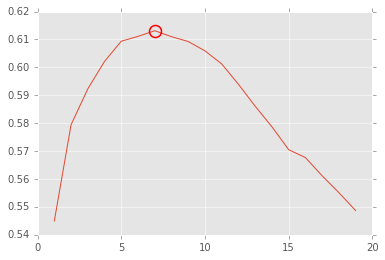

In [296]:
# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]


# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [297]:
best = grid.best_estimator_
best

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [304]:
ctree = tree.DecisionTreeClassifier(random_state=1, criterion='gini',max_depth=6)

ctree.fit(X_train, y_train)

# Fit the decision tree classifier
ctree.predict(X_test)
# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate the AUC metric
print "ROC(Descision tree) = ",metrics.roc_auc_score(y_test, preds)

print(classification_report(y_test, preds, target_names=target_names))

ROC(Descision tree) =  0.560187891944
                 precision    recall  f1-score   support

 Readmission_NO       0.64      0.89      0.74     10756
Readmission_YES       0.58      0.23      0.33      7124

    avg / total       0.61      0.63      0.58     17880

